In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

In [2]:
def model_score(model, level, k):
    df_train_data = pd.read_csv('../data/kmer/{}/train_{}mer.csv'.format(level, k))
    df_val_data = pd.read_csv('../data/kmer/{}/val_{}mer.csv'.format(level, k))

    trainX = df_train_data.values[:, :-2].astype(np.float16)
    trainY = df_train_data['label'].values.astype(np.int8)

    size_mb = trainX.nbytes / (1024 ** 2)

    valX = df_val_data.values[:, :-2].astype(np.float16)
    valY = df_val_data['label'].values.astype(np.int8)

    model.fit(trainX, trainY)
    predY = model.predict(valX)
    print('\n{} results for {} with k={}'.format(type(model).__name__, level, k))
    print(f1_score(valY, predY, average='macro'))

In [ ]:
model = SVC(cache_size=7000, verbose=True, gamma='auto', C=0.6)

for level in ['phylum', 'class', 'order']:
    for k in range(3, 7):
        model_score(model, level, k)

In [8]:
model = RandomForestClassifier(n_estimators=5)

for level in ['phylum', 'class', 'order']:
    for k in range(3, 7):
        model_score(model, level, k)


RandomForestClassifier results for phylum with k=3
0.9507774228640425

RandomForestClassifier results for phylum with k=4
0.9702973655586895

RandomForestClassifier results for phylum with k=5
0.9894558498295373

RandomForestClassifier results for phylum with k=6
0.9927411691637431

RandomForestClassifier results for class with k=3
0.9233012403129554

RandomForestClassifier results for class with k=4
0.9621727545604317

RandomForestClassifier results for class with k=5
0.9774412340448446

RandomForestClassifier results for class with k=6
0.9889096305012952

RandomForestClassifier results for order with k=3
0.8739621894901386

RandomForestClassifier results for order with k=4
0.9284658507368582

RandomForestClassifier results for order with k=5
0.9587391188225647

RandomForestClassifier results for order with k=6
0.9688980589372205


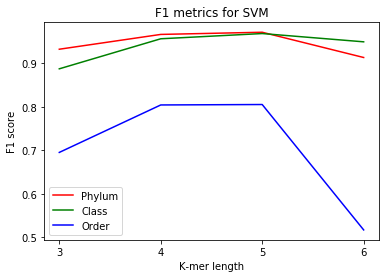

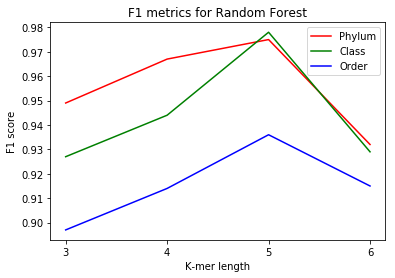

In [9]:
kvals = [3, 4, 5, 6]
svm_phylum = [0.932, 0.966, 0.971, 0.913]
svm_class = [0.887, 0.956, 0.968, 0.949]
svm_order = [0.695, 0.804, 0.805, 0.517]

# ---- plot for SVM

plt.plot(kvals, svm_phylum, color='r', label='Phylum')
plt.plot(kvals, svm_class, color='g', label='Class')
plt.plot(kvals, svm_order, color='b', label='Order')

plt.xticks(kvals)

# plt.yscale('log')
# plt.yticks(np.geomspace(0.1, 1))

plt.xlabel('K-mer length')
plt.ylabel('F1 score')
plt.title('F1 metrics for SVM')
plt.legend()
plt.show()

# ---- plot for RandomForest

rf_phylum = [0.949, 0.967, 0.975, 0.932]
rf_class = [0.927, 0.944, 0.978, 0.929]
rf_order = [0.897, 0.914, 0.936, 0.915]

plt.plot(kvals, rf_phylum, color='r', label='Phylum')
plt.plot(kvals, rf_class, color='g', label='Class')
plt.plot(kvals, rf_order, color='b', label='Order')

plt.xticks(kvals)

# plt.yscale('log')
# plt.yticks(np.geomspace(0.1, 1))

plt.xlabel('K-mer length')
plt.ylabel('F1 score')
plt.title('F1 metrics for Random Forest')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)